1) K-beauty 는 성장하고 있을까? 가설세우기, 데이터 로드, 전처리

# 5.1 국가통계포털 데이터셋 소개

### 핵심 키워드

- KOSIS(국가통계포털)

[KOSIS(국가통계포털)](https://kosis.kr/index/index.do)

- 국내통계 > 주제별통계 > 도소매서비스 > 온라인쇼핑동향조사 > 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 (또는 지역별 / 상품군별 온라인쇼핑 해외직접판매액)

# 5.2 데이터셋 로드하기

### 핵심 키워드

- pandas, seaborn, matplotlib

- pd.read_csv()

## 온라인 쇼핑 판매액

- 1일 통계청이 발표한 '2023년 12월 및 연간 온라인쇼핑동향'을 보면 지난해 온라인쇼핑 거래액은 227조3천470억원으로 전년보다 8.3% 증가했다. [[연합인포맥스](https://news.einfomax.co.kr/news/articleView.html?idxno=4297086)]

- 이 분석을 한 뒤에 구매액도 분석해보면 좋을 것 같습니다.

- 어떤 국가로 어떤 판매전략을 세우면 좋을 지 분석해보겠습니다.

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import os

%matplotlib inline

In [2]:
# Mac : posix
# Windows : nt
os.name

'nt'

In [3]:
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

## 데이터 로드하기

In [4]:
# 1사분기부터 4사분기까지의 데이터가 column으로 나와있습니다.\
df_raw = pd.read_csv("data/101_DT_1KE10081_20240819172726.csv", encoding = "cp949")
df_raw.head()

,지역별,상품군별,판매유형별,항목,단위,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,...,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4,2023.3/4,2023.4/4,2024.1/4,2024.2/4,Unnamed: 47
0,합계,합계,계,해외직접판매액[백만원],백만원,148272.0,153641.0,163999.0,213216.0,269101.0,...,505011.0,421606.0,353963.0,291336.0,481202.0,452744.0,471927.0,415256.0,448904.0,NaN
1,합계,합계,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,300602.0,211727.0,152997.0,111187.0,281235.0,271525.0,280391.0,239885.0,257535.0,NaN
2,합계,합계,면세점 이외,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,204409.0,209879.0,200966.0,180149.0,199967.0,181219.0,191536.0,175371.0,191369.0,NaN
3,합계,컴퓨터 및 주변기기,계,해외직접판매액[백만원],백만원,4915.0,4052.0,3912.0,3529.0,2903.0,...,3288.0,2944.0,3195.0,4044.0,3205.0,4260.0,3769.0,15307.0,21489.0,NaN
4,합계,컴퓨터 및 주변기기,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
df_raw.shape

(969, 48)

In [6]:
df_raw.columns

Index(['지역별', '상품군별', '판매유형별', '항목', '단위', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4', '2020.1/4', '2020.2/4', '2020.3/4',
       '2020.4/4', '2021.1/4', '2021.2/4', '2021.3/4', '2021.4/4', '2022.1/4',
       '2022.2/4', '2022.3/4', '2022.4/4', '2023.1/4', '2023.2/4', '2023.3/4',
       '2023.4/4', '2024.1/4', '2024.2/4', 'Unnamed: 47'],
      dtype='object')

In [7]:
df_raw["Unnamed: 47"].value_counts()

Series([], Name: Unnamed: 47, dtype: int64)

In [8]:
df_raw.drop(columns="Unnamed: 47", axis=1, inplace = True)

In [9]:
df_raw["지역별"].value_counts()

합계         51
유럽         51
아프리카       51
중남미        51
대양주        51
기타 유럽      51
영국         51
유럽연합       51
유럽연합+영국    51
캐나다        51
아시아        51
미국         51
북미         51
기타 아시아     51
중동         51
아세안        51
일본         51
중국         51
기타         51
Name: 지역별, dtype: int64

In [10]:
df_raw[df_raw["지역별"] == "미국"]

,지역별,상품군별,판매유형별,항목,단위,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,...,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4,2023.3/4,2023.4/4,2024.1/4,2024.2/4
408,미국,합계,계,해외직접판매액[백만원],백만원,25773.0,22573.0,21288.0,26729.0,39945.0,...,55878.0,50779.0,49997.0,56551.0,49332.0,60356.0,61652.0,72022.0,67469.0,80956.0
409,미국,합계,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,127.0,220.0,222.0,362.0,222.0,362.0,1084.0,1700.0,670.0,1416.0
410,미국,합계,면세점 이외,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,55751.0,50559.0,49775.0,56189.0,49110.0,59994.0,60568.0,70322.0,66799.0,79540.0
411,미국,컴퓨터 및 주변기기,계,해외직접판매액[백만원],백만원,2216.0,1666.0,1776.0,1675.0,1469.0,...,1020.0,976.0,839.0,1019.0,1419.0,1059.0,984.0,1067.0,6325.0,9463.0
412,미국,컴퓨터 및 주변기기,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,미국,컴퓨터 및 주변기기,면세점 이외,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,1020.0,976.0,839.0,1019.0,1419.0,1059.0,984.0,1067.0,6325.0,9463.0
414,미국,가전·전자·통신기기,계,해외직접판매액[백만원],백만원,2875.0,2758.0,2894.0,3527.0,4397.0,...,472.0,541.0,537.0,602.0,934.0,1018.0,422.0,919.0,524.0,1451.0
415,미국,가전·전자·통신기기,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,1.0,6.0,6.0,14.0,16.0,50.0,22.0,61.0
416,미국,가전·전자·통신기기,면세점 이외,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,472.0,538.0,536.0,596.0,928.0,1004.0,406.0,869.0,502.0,1390.0
417,미국,가전·전자,계,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,822.0,893.0,401.0,894.0,462.0,1416.0


# 5.3 데이터 전처리 - tidy data 만들기

### 핵심 키워드

- tidy data

- df.melt()

## melt 함수

- 집계를 한 데이터를 tidy data 형식으로 만들어야 합니다.
- melt는 행에 있는 데이터를 열로 옮기는 것입니다.

In [11]:
df_raw.columns

Index(['지역별', '상품군별', '판매유형별', '항목', '단위', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4', '2020.1/4', '2020.2/4', '2020.3/4',
       '2020.4/4', '2021.1/4', '2021.2/4', '2021.3/4', '2021.4/4', '2022.1/4',
       '2022.2/4', '2022.3/4', '2022.4/4', '2023.1/4', '2023.2/4', '2023.3/4',
       '2023.4/4', '2024.1/4', '2024.2/4'],
      dtype='object')

In [12]:
# id_vars에 들어가지 않은 열들은 value_vars에 들어감
df_raw.melt(id_vars=["지역별", "상품군별", "판매유형별"])

,지역별,상품군별,판매유형별,variable,value
0,합계,합계,계,항목,해외직접판매액[백만원]
1,합계,합계,면세점,항목,해외직접판매액[백만원]
2,합계,합계,면세점 이외,항목,해외직접판매액[백만원]
3,합계,컴퓨터 및 주변기기,계,항목,해외직접판매액[백만원]
4,합계,컴퓨터 및 주변기기,면세점,항목,해외직접판매액[백만원]
...,...,...,...,...,...
42631,기타,생활·자동차용품,면세점,2024.2/4,NaN
42632,기타,생활·자동차용품,면세점 이외,2024.2/4,NaN
42633,기타,기 타,계,2024.2/4,NaN
42634,기타,기 타,면세점,2024.2/4,NaN


In [13]:
# variable, value라는 column의 이름을 "기간", "백만원"으로 변경
df = df_raw.melt(id_vars=["지역별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df.shape

(42636, 5)

In [14]:
df

,지역별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,항목,해외직접판매액[백만원]
1,합계,합계,면세점,항목,해외직접판매액[백만원]
2,합계,합계,면세점 이외,항목,해외직접판매액[백만원]
3,합계,컴퓨터 및 주변기기,계,항목,해외직접판매액[백만원]
4,합계,컴퓨터 및 주변기기,면세점,항목,해외직접판매액[백만원]
...,...,...,...,...,...
42631,기타,생활·자동차용품,면세점,2024.2/4,NaN
42632,기타,생활·자동차용품,면세점 이외,2024.2/4,NaN
42633,기타,기 타,계,2024.2/4,NaN
42634,기타,기 타,면세점,2024.2/4,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42636 entries, 0 to 42635
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역별     42636 non-null  object
 1   상품군별    42636 non-null  object
 2   판매유형별   42636 non-null  object
 3   기간      42636 non-null  object
 4   백만원     28350 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [16]:
df = df[(df["기간"] != "항목") & (df["기간"] != "단위")]
df.head()

,지역별,상품군별,판매유형별,기간,백만원
1938,합계,합계,계,2014.1/4,148272.0
1939,합계,합계,면세점,2014.1/4,NaN
1940,합계,합계,면세점 이외,2014.1/4,NaN
1941,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0
1942,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40698 entries, 1938 to 42635
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역별     40698 non-null  object
 1   상품군별    40698 non-null  object
 2   판매유형별   40698 non-null  object
 3   기간      40698 non-null  object
 4   백만원     26412 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


# 5.4 데이터 전처리 - 문자열 분리하고 데이터 타입 변경하기

### 핵심 키워드

- split, map(), lambda 함수

- replace, astype()

## 기간에서 연도 분리하기

In [18]:
df["기간"]

1938     2014.1/4
1939     2014.1/4
1940     2014.1/4
1941     2014.1/4
1942     2014.1/4
           ...   
42631    2024.2/4
42632    2024.2/4
42633    2024.2/4
42634    2024.2/4
42635    2024.2/4
Name: 기간, Length: 40698, dtype: object

In [19]:
df["기간"].map(lambda x : int(x.split(".")[0]))

1938     2014
1939     2014
1940     2014
1941     2014
1942     2014
         ... 
42631    2024
42632    2024
42633    2024
42634    2024
42635    2024
Name: 기간, Length: 40698, dtype: int64

In [20]:
df.loc[:, "연도"] = df["기간"].map(lambda x : int(x.split(".")[0]))
df.head()

C:\Users\josun\AppData\Local\Temp\ipykernel_5744\500336397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "연도"] = df["기간"].map(lambda x : int(x.split(".")[0]))


,지역별,상품군별,판매유형별,기간,백만원,연도
1938,합계,합계,계,2014.1/4,148272.0,2014
1939,합계,합계,면세점,2014.1/4,NaN,2014
1940,합계,합계,면세점 이외,2014.1/4,NaN,2014
1941,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014
1942,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014


In [21]:
df.loc[:, "분기"] = df["기간"].map(lambda x : int(x.split(".")[1].split("/")[0]))
df.head()

C:\Users\josun\AppData\Local\Temp\ipykernel_5744\800528709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "분기"] = df["기간"].map(lambda x : int(x.split(".")[1].split("/")[0]))


,지역별,상품군별,판매유형별,기간,백만원,연도,분기
1938,합계,합계,계,2014.1/4,148272.0,2014,1
1939,합계,합계,면세점,2014.1/4,NaN,2014,1
1940,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
1941,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
1942,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


## 금액을 수치 데이터로 표현하기 위해 데이터 타입 변경

In [22]:
df["백만원"].value_counts()

-       8304
0.0     2868
0       1819
1.0      253
2.0      145
        ... 
6313       1
5003       1
1310       1
1019       1
1542       1
Name: 백만원, Length: 5312, dtype: int64

In [23]:
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df["백만원"]

C:\Users\josun\AppData\Local\Temp\ipykernel_5744\4069378333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)


1938     148272.0
1939          NaN
1940          NaN
1941       4915.0
1942          NaN
           ...   
42631         NaN
42632         NaN
42633         NaN
42634         NaN
42635         NaN
Name: 백만원, Length: 40698, dtype: float64

## 필요 없는 데이터 제거하기

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40698 entries, 1938 to 42635
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     40698 non-null  object 
 1   상품군별    40698 non-null  object 
 2   판매유형별   40698 non-null  object 
 3   기간      40698 non-null  object 
 4   백만원     18108 non-null  float64
 5   연도      40698 non-null  int64  
 6   분기      40698 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.5+ MB


In [25]:
# 값이 "합계"가 아닌 데이터만 집계하여 df을 다시 업데이트
df = df[(df["지역별"] != "합계") & (df["상품군별"] != "합계")].copy()

In [26]:
df.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
1992,아시아,컴퓨터 및 주변기기,계,2014.1/4,NaN,2014,1
1993,아시아,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
1994,아시아,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
1995,아시아,가전·전자·통신기기,계,2014.1/4,NaN,2014,1
1996,아시아,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36288 entries, 1992 to 42635
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     36288 non-null  object 
 1   상품군별    36288 non-null  object 
 2   판매유형별   36288 non-null  object 
 3   기간      36288 non-null  object 
 4   백만원     15480 non-null  float64
 5   연도      36288 non-null  int64  
 6   분기      36288 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2+ MB


In [28]:
df.isnull().sum()

지역별          0
상품군별         0
판매유형별        0
기간           0
백만원      20808
연도           0
분기           0
dtype: int64

---

2) 데이터 시각화로 가설 검정하기

# 5.5 전체 상품군별 데이터로 연도별 증가추세 시각화 하기

### 핵심 키워드

- sns.lineplot() / sns.relplot()

- plt.legend()

## 전체 상품군 판매액 시각화

In [29]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
1992,아시아,컴퓨터 및 주변기기,계,2014.1/4,NaN,2014,1
1995,아시아,가전·전자·통신기기,계,2014.1/4,NaN,2014,1
1998,아시아,가전·전자,계,2014.1/4,NaN,2014,1
2001,아시아,통신기기,계,2014.1/4,NaN,2014,1
2004,아시아,소프트웨어,계,2014.1/4,NaN,2014,1


<Axes: xlabel='연도', ylabel='백만원'>

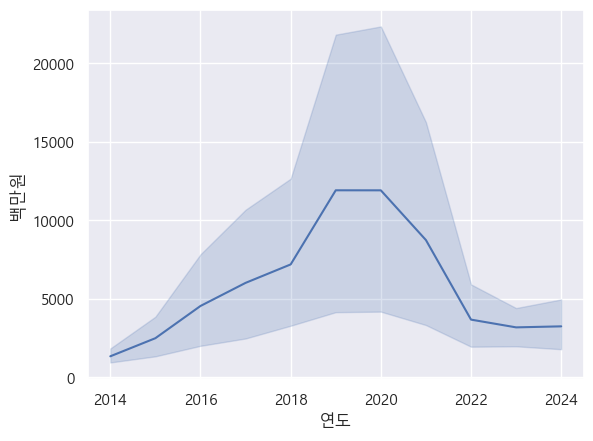

In [30]:
sns.lineplot(data=df_total, x="연도", y="백만원")

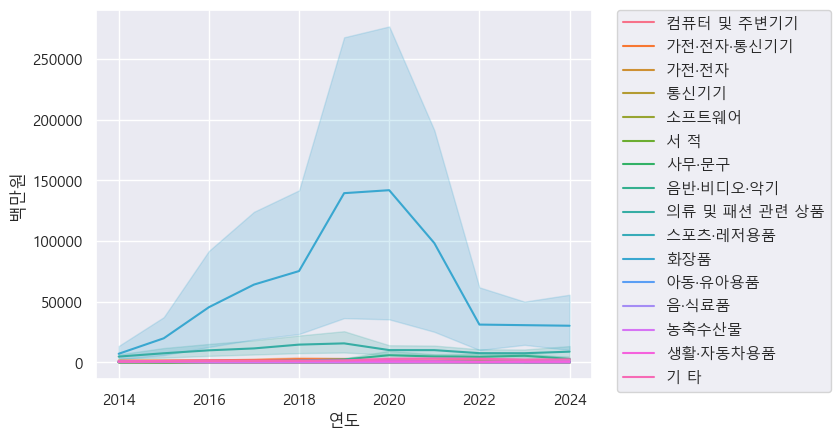

In [31]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

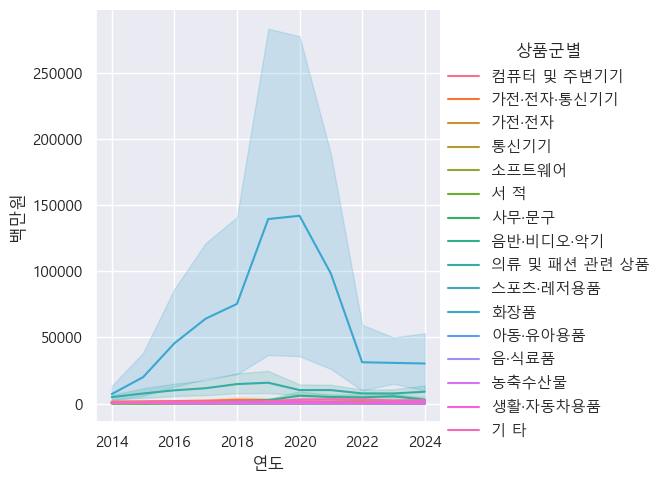

In [32]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line")

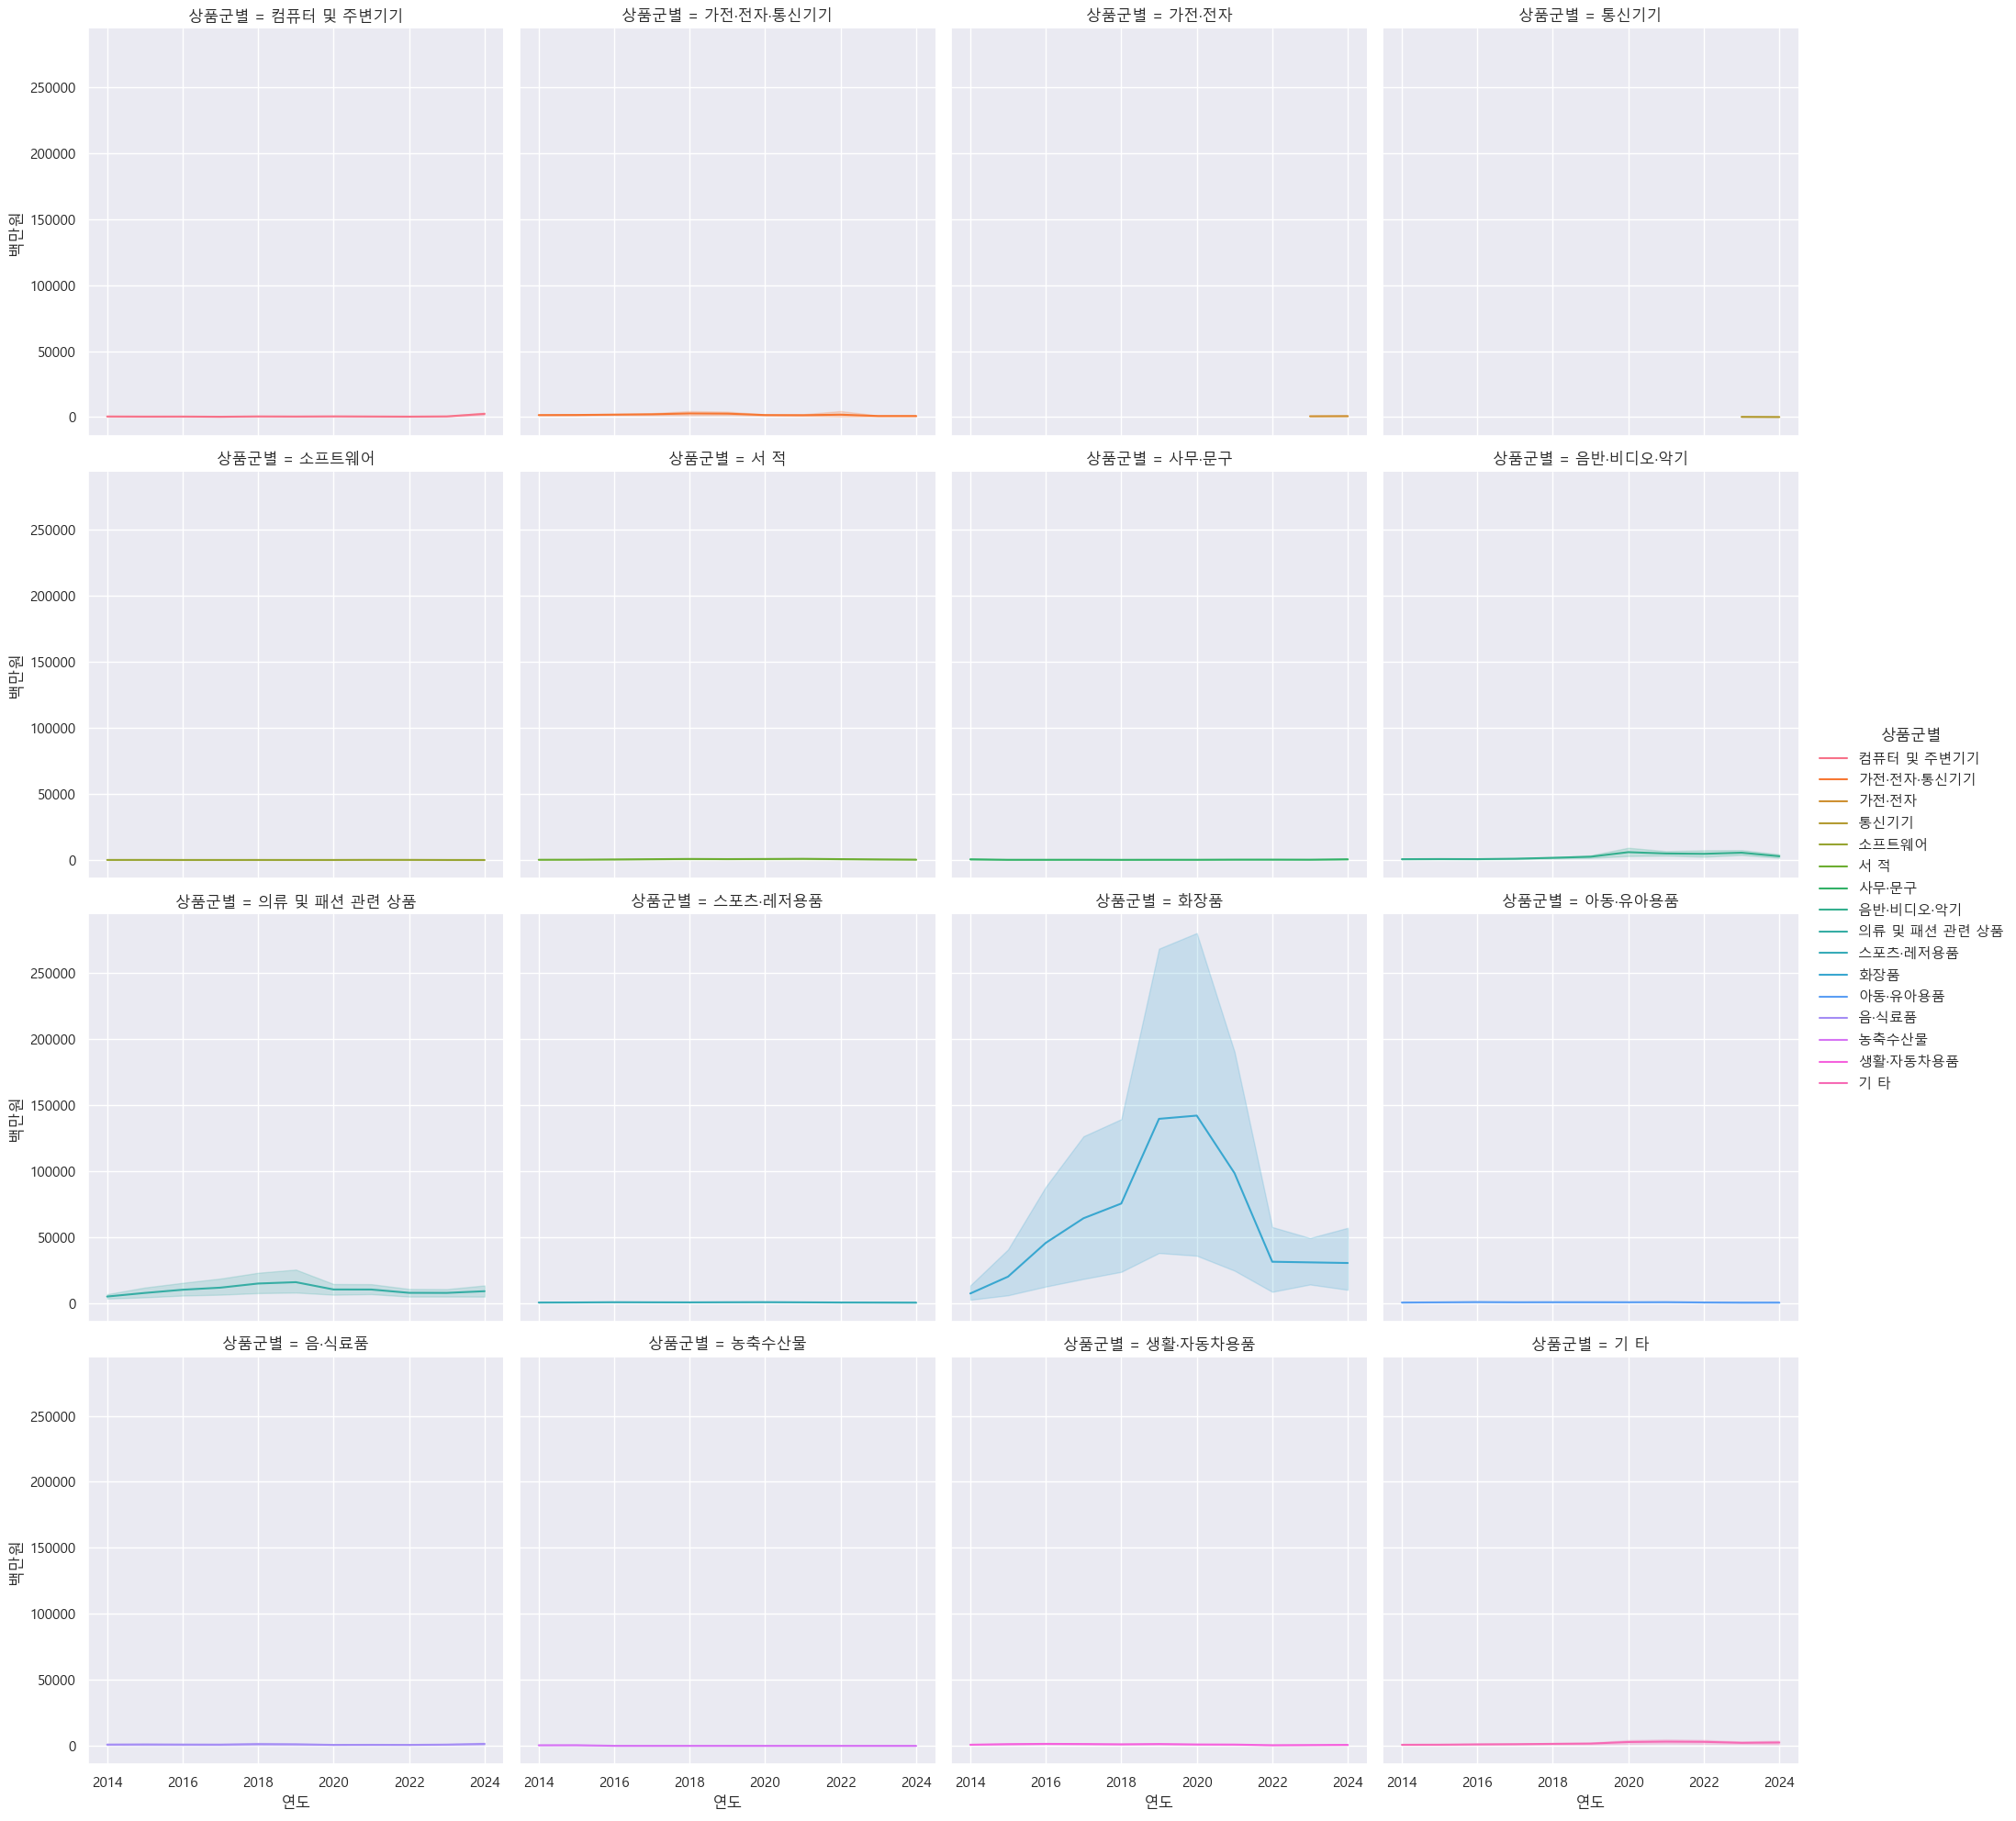

In [33]:
# 화장품이 다른 상품군들에 비해 해외직접판매액이 크게 증가했다가 감소한 것을 알 수 있음
# 코로나의 영향을 받아 감소한 것으로 예상
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [34]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
df_sub

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
1992,아시아,컴퓨터 및 주변기기,계,2014.1/4,NaN,2014,1
1995,아시아,가전·전자·통신기기,계,2014.1/4,NaN,2014,1
1998,아시아,가전·전자,계,2014.1/4,NaN,2014,1
2001,아시아,통신기기,계,2014.1/4,NaN,2014,1
2004,아시아,소프트웨어,계,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
42621,기타,아동·유아용품,계,2024.2/4,NaN,2024,2
42624,기타,음·식료품,계,2024.2/4,NaN,2024,2
42627,기타,농축수산물,계,2024.2/4,NaN,2024,2
42630,기타,생활·자동차용품,계,2024.2/4,NaN,2024,2


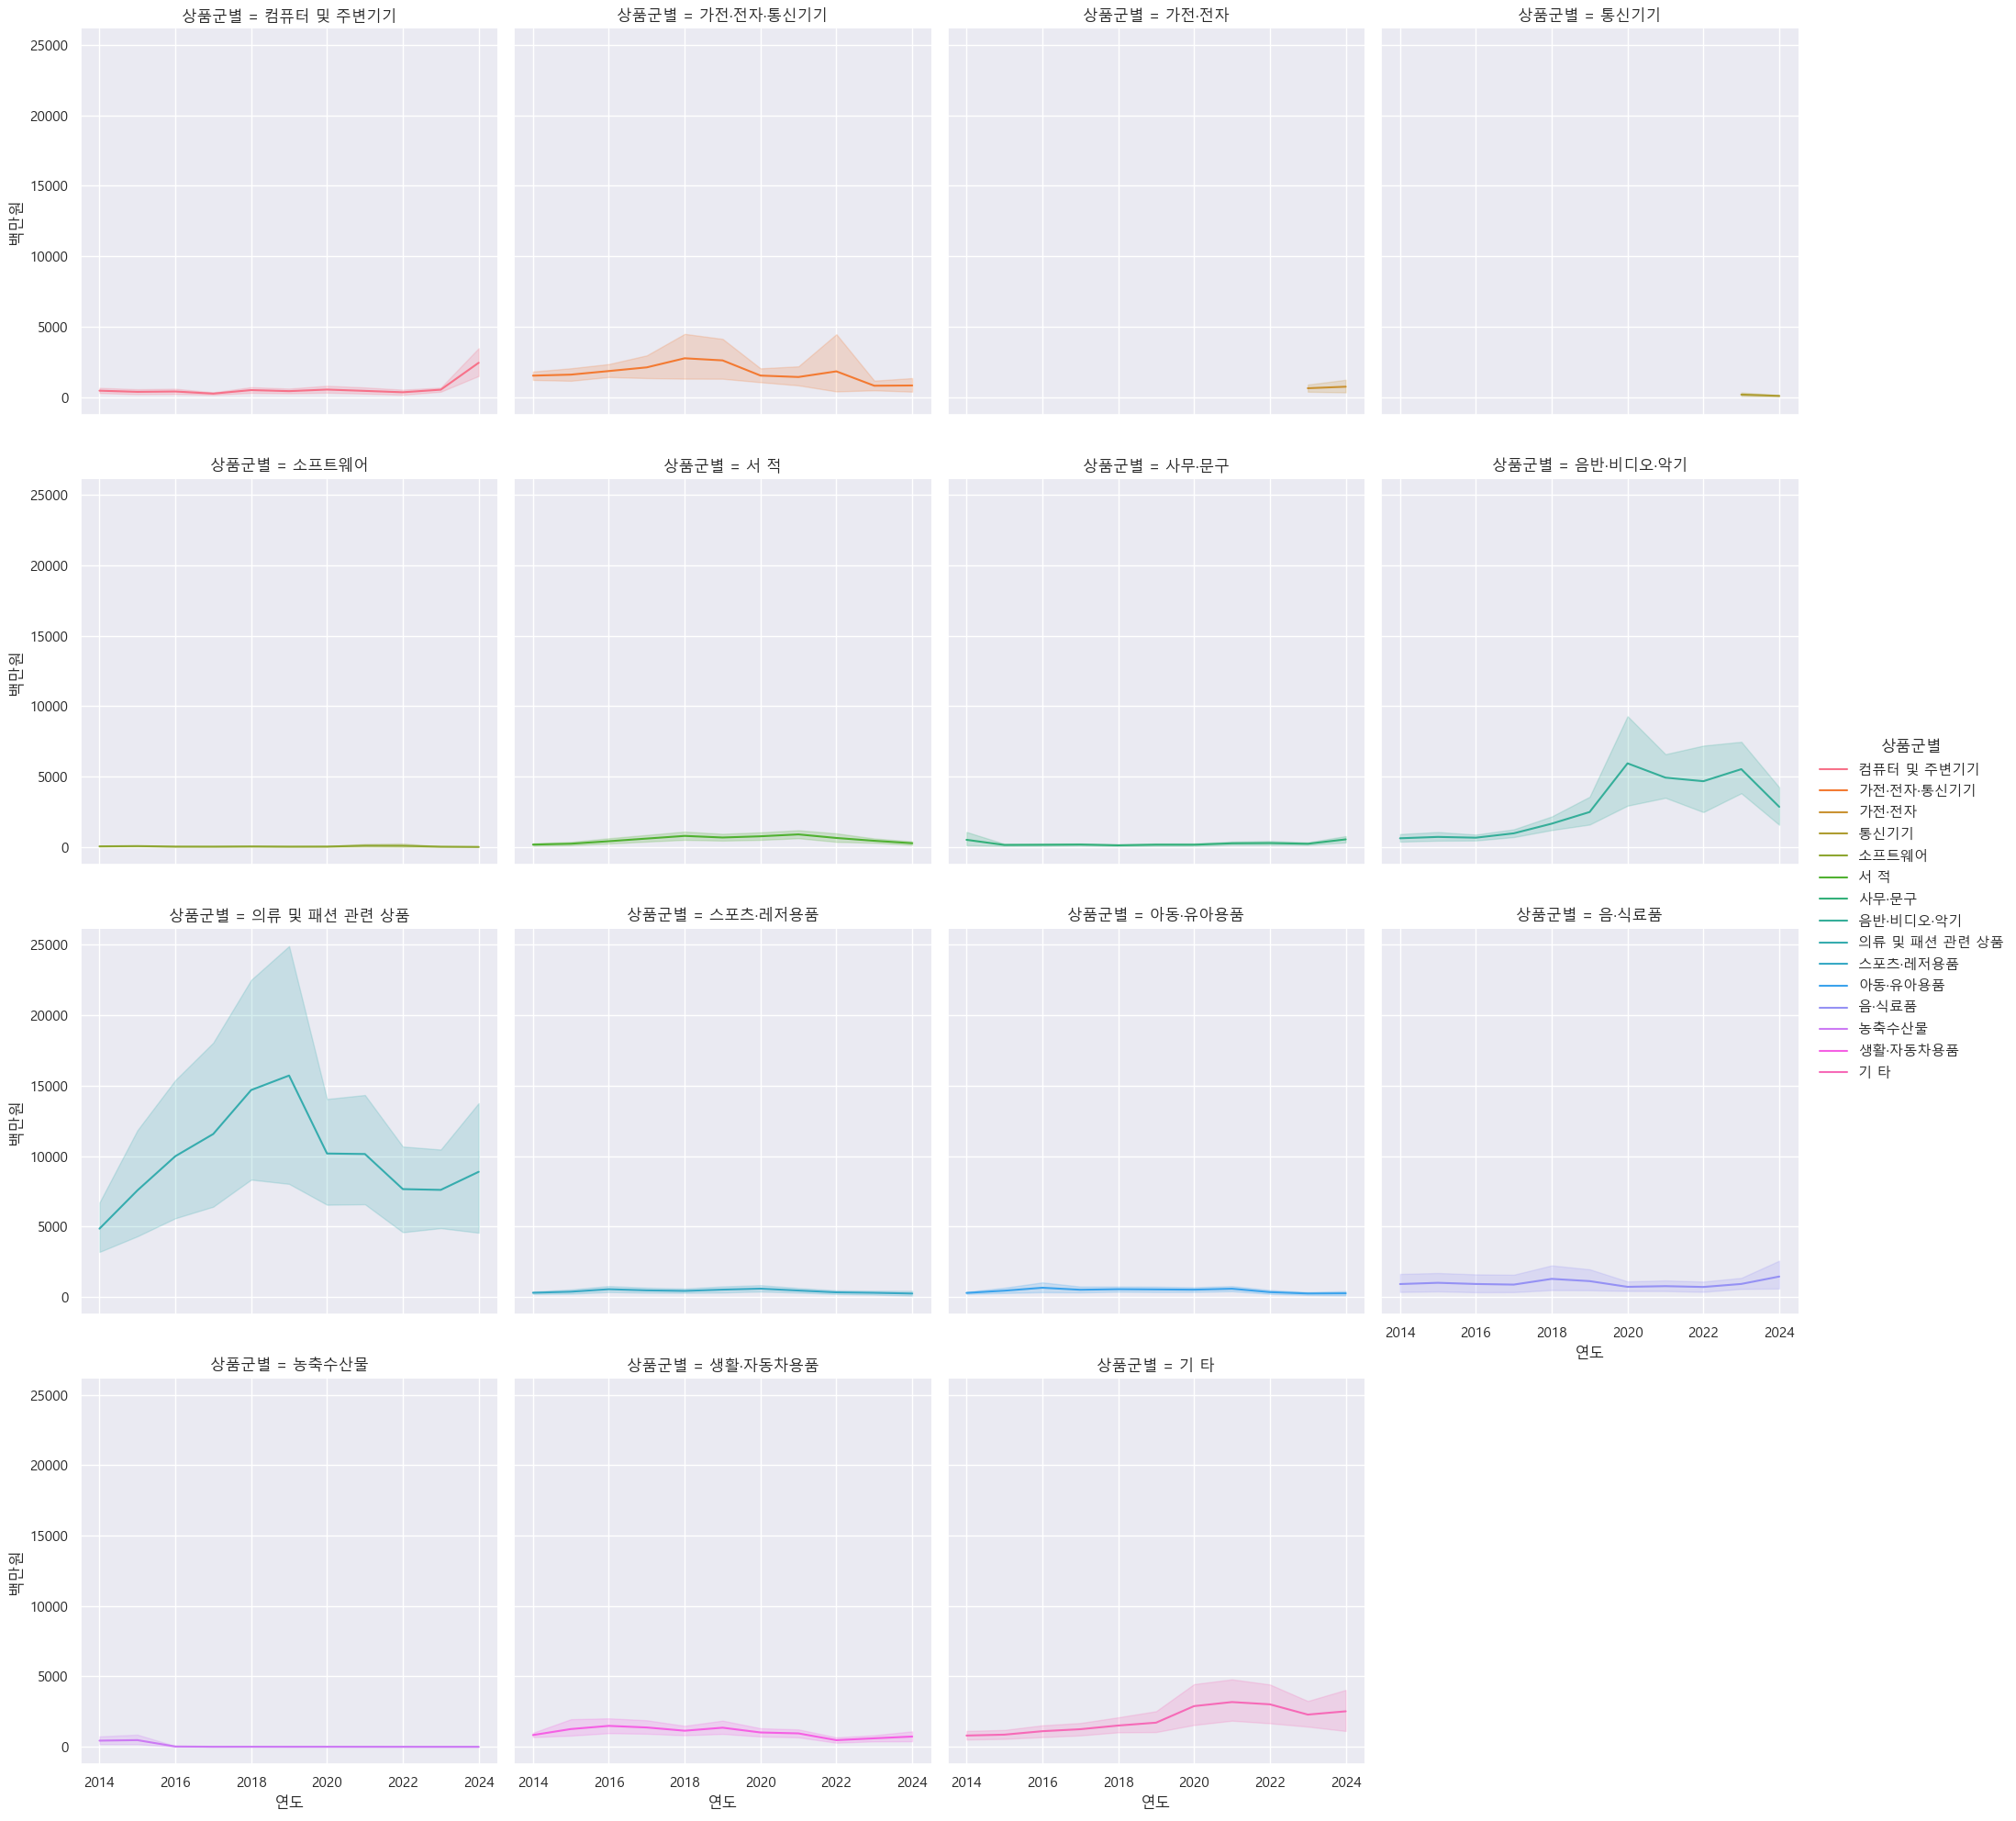

In [35]:
# 의류, 패션 상품도 많이 판매했다 감소함을 알 수 있음
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")

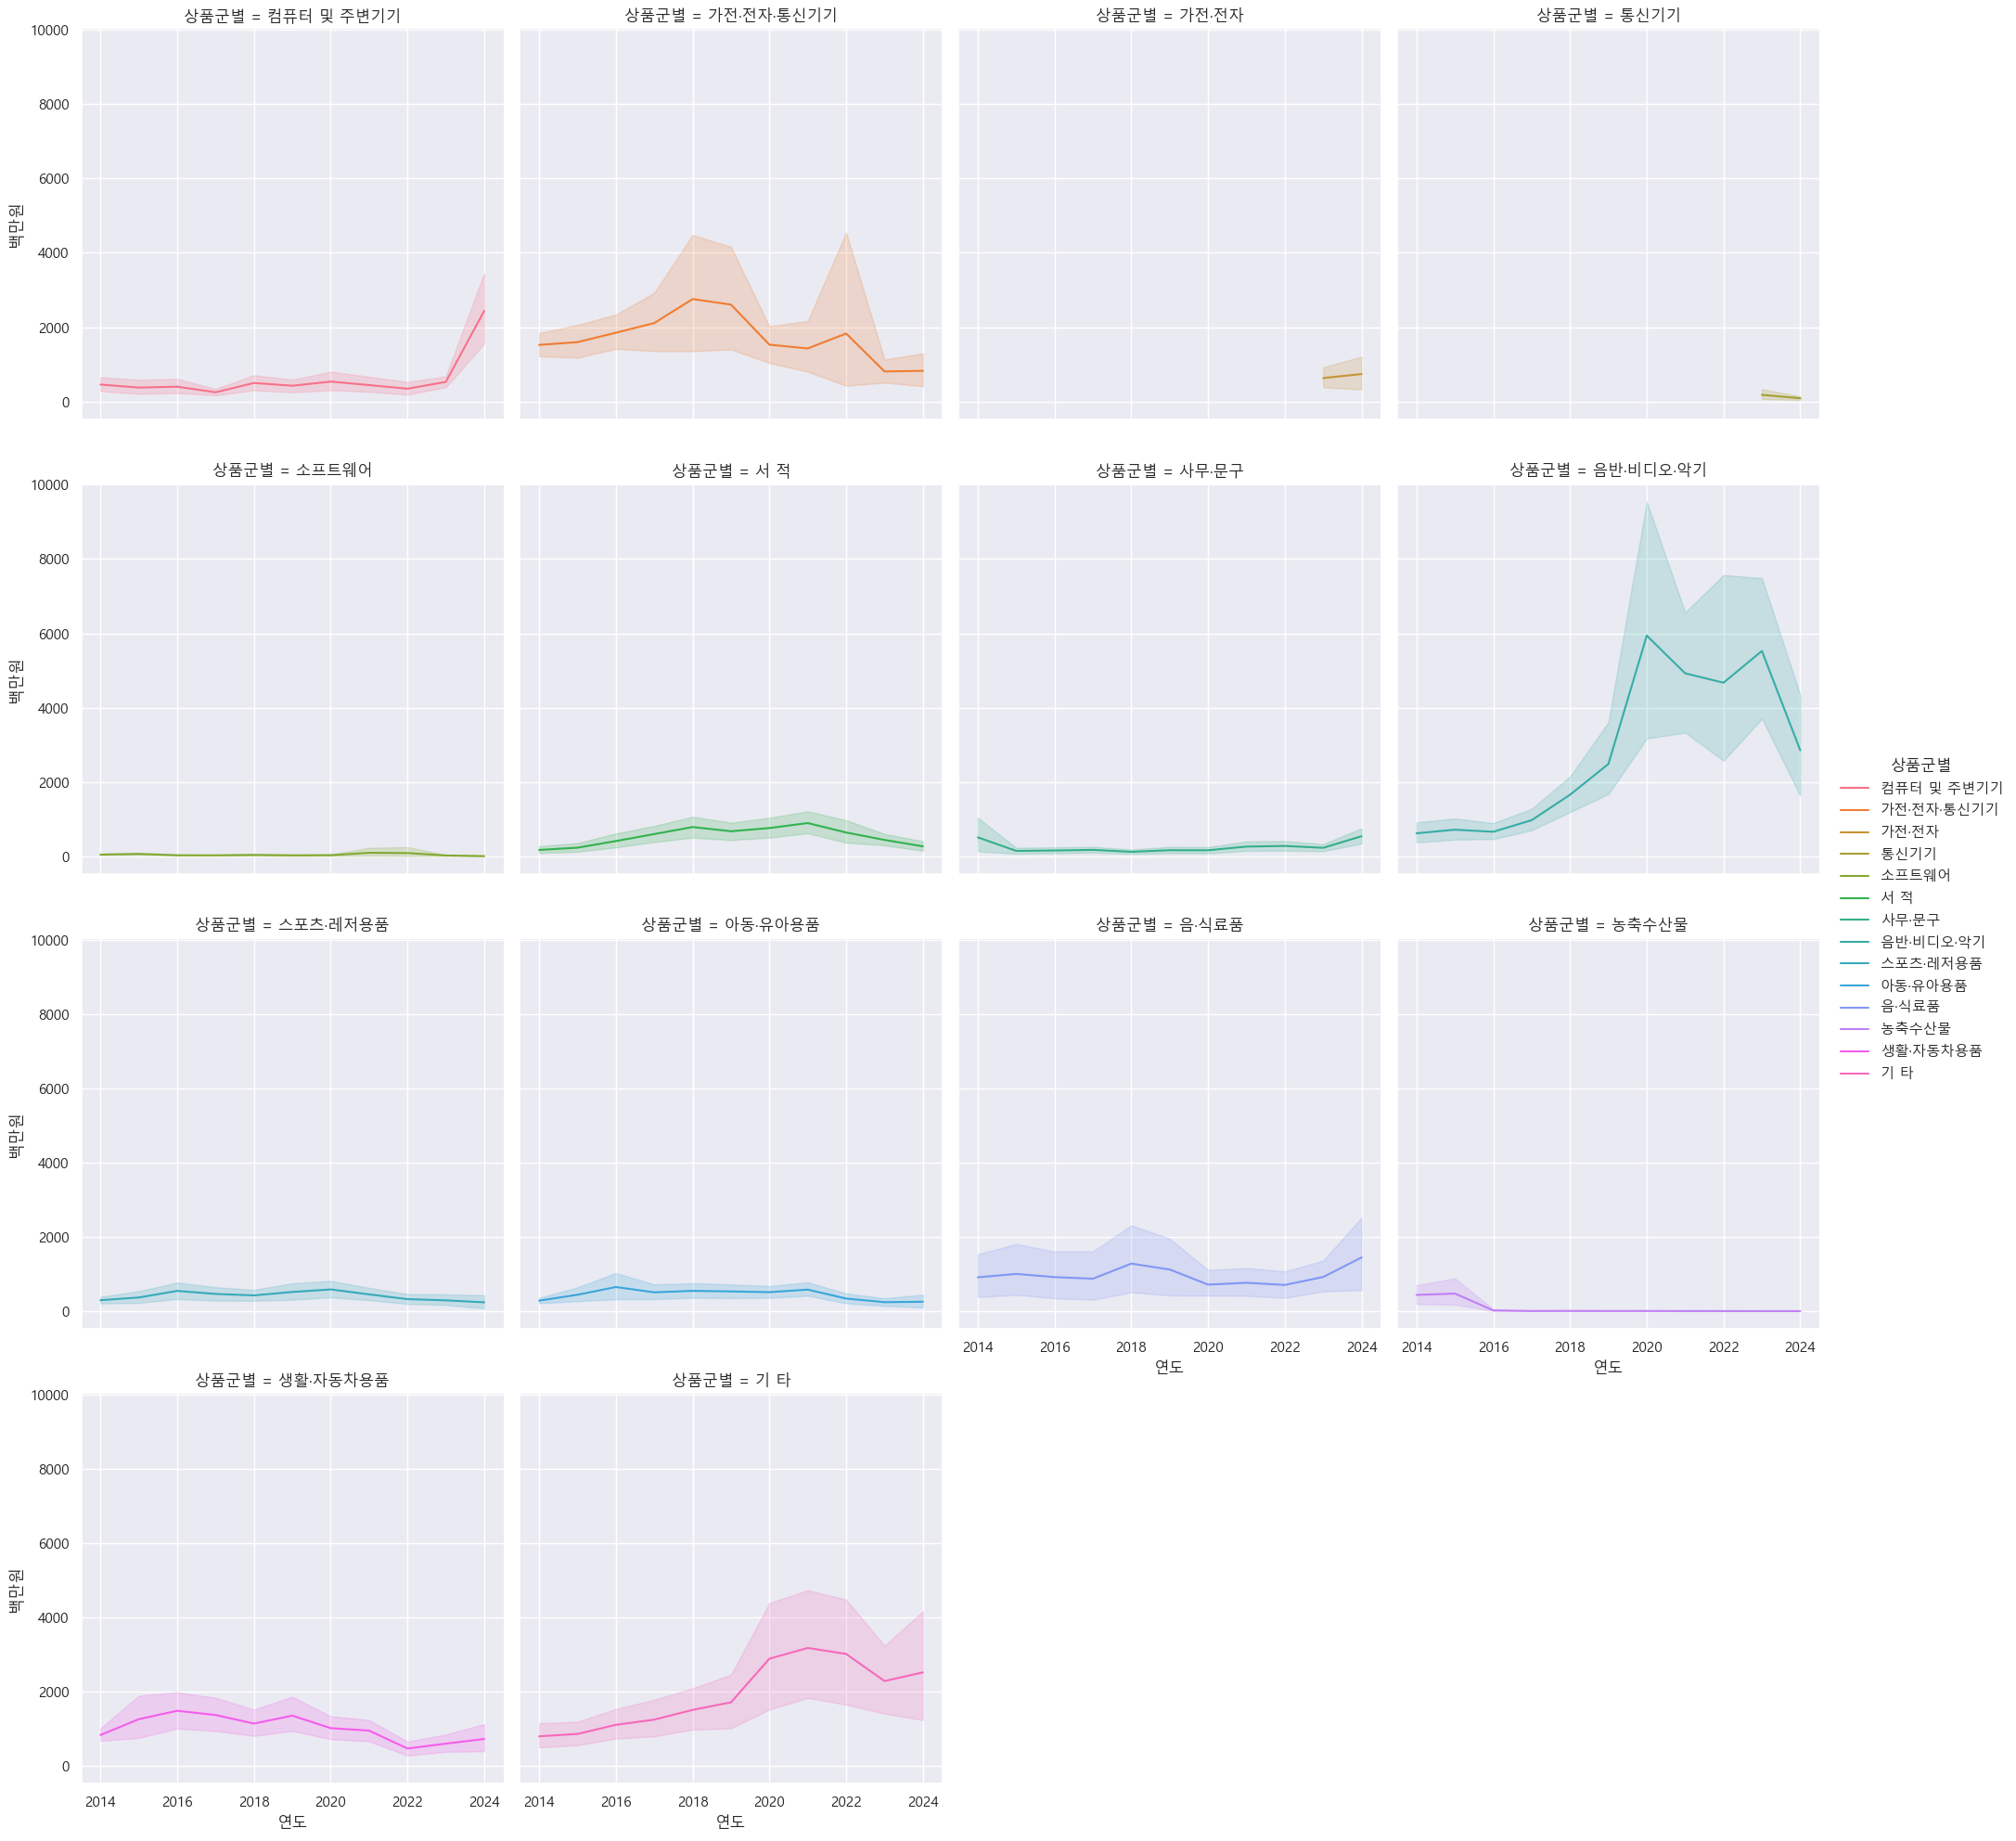

In [37]:
# 의류, 패션 상품도 빼고 나니 가전과 음반 쪽 판매가 두드러지게 나타난다.
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련 상품"])].copy()
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")

# 5.6 - 화장품 온라인 해외 직접 판매액 시각화

### 핵심 키워드

- sns.lineplot()

- plt.figure(), plt.xticks()

## 분기별 화장품 판매액 데이터 시각화

In [38]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
2022,아시아,화장품,계,2014.1/4,NaN,2014,1
2073,중국,화장품,계,2014.1/4,32235.0,2014,1
2124,일본,화장품,계,2014.1/4,1034.0,2014,1
2175,아세안,화장품,계,2014.1/4,398.0,2014,1
2226,중동,화장품,계,2014.1/4,418.0,2014,1
...,...,...,...,...,...,...,...
42414,기타 유럽,화장품,계,2024.2/4,149.0,2024,2
42465,대양주,화장품,계,2024.2/4,198.0,2024,2
42516,중남미,화장품,계,2024.2/4,33.0,2024,2
42567,아프리카,화장품,계,2024.2/4,125.0,2024,2


<Axes: xlabel='연도', ylabel='백만원'>

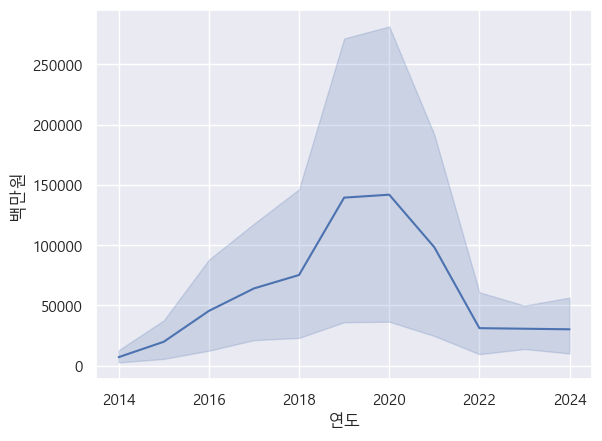

In [39]:
sns.lineplot(data=df_cosmetic, x="연도", y="백만원")

<Axes: xlabel='연도', ylabel='백만원'>

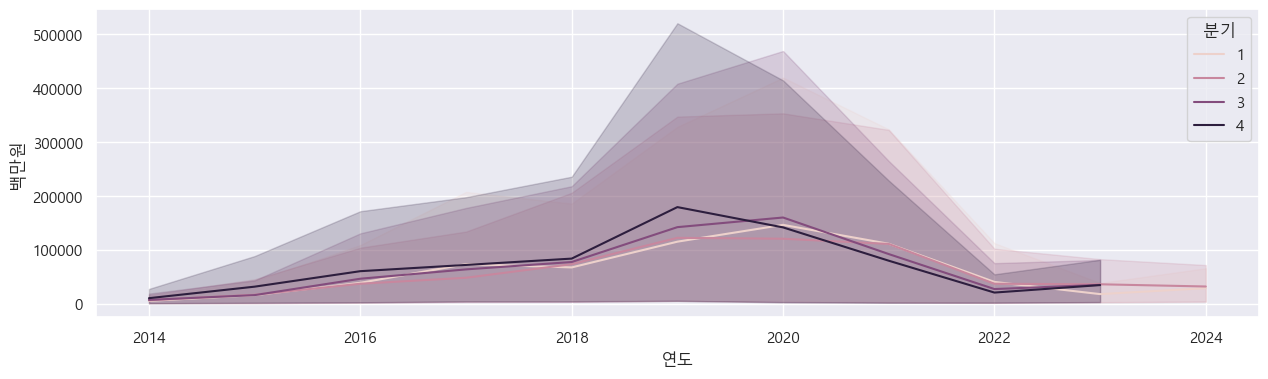

In [40]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

## 기간별 화장품 판매액 데이터 시각화

<Axes: xlabel='기간', ylabel='백만원'>

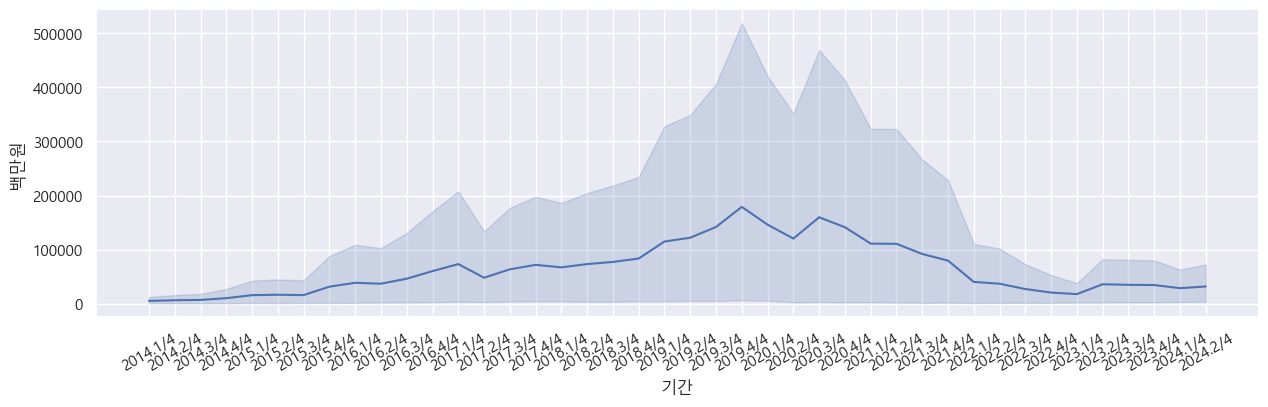

In [41]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

In [42]:
df_cosmetic.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
2022,아시아,화장품,계,2014.1/4,NaN,2014,1
2073,중국,화장품,계,2014.1/4,32235.0,2014,1
2124,일본,화장품,계,2014.1/4,1034.0,2014,1
2175,아세안,화장품,계,2014.1/4,398.0,2014,1
2226,중동,화장품,계,2014.1/4,418.0,2014,1


<Axes: xlabel='기간', ylabel='백만원'>

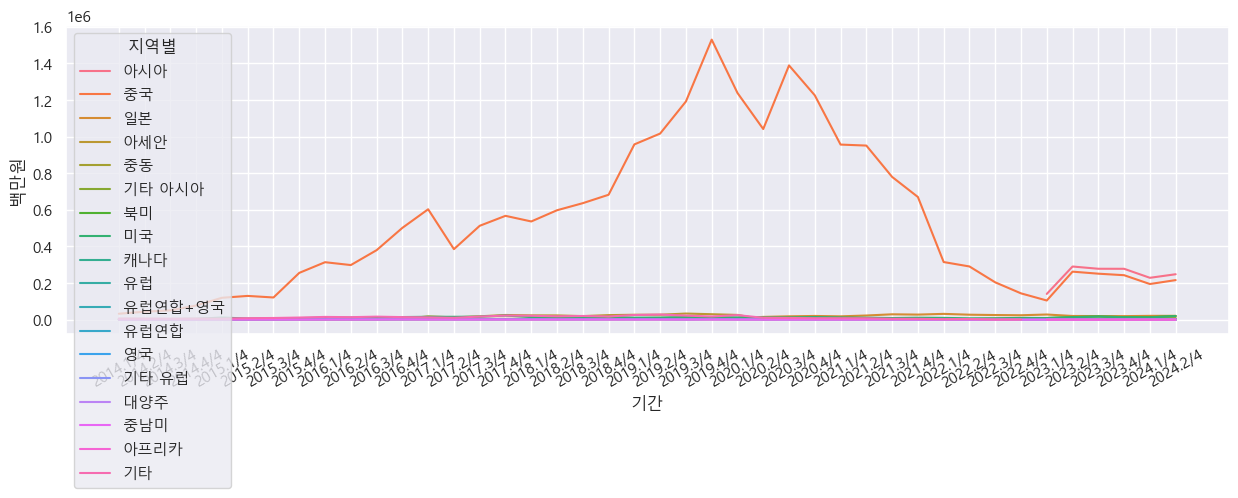

In [44]:
# 중국에서 가장 판매액이 높음
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="지역별")

<Axes: xlabel='기간', ylabel='백만원'>

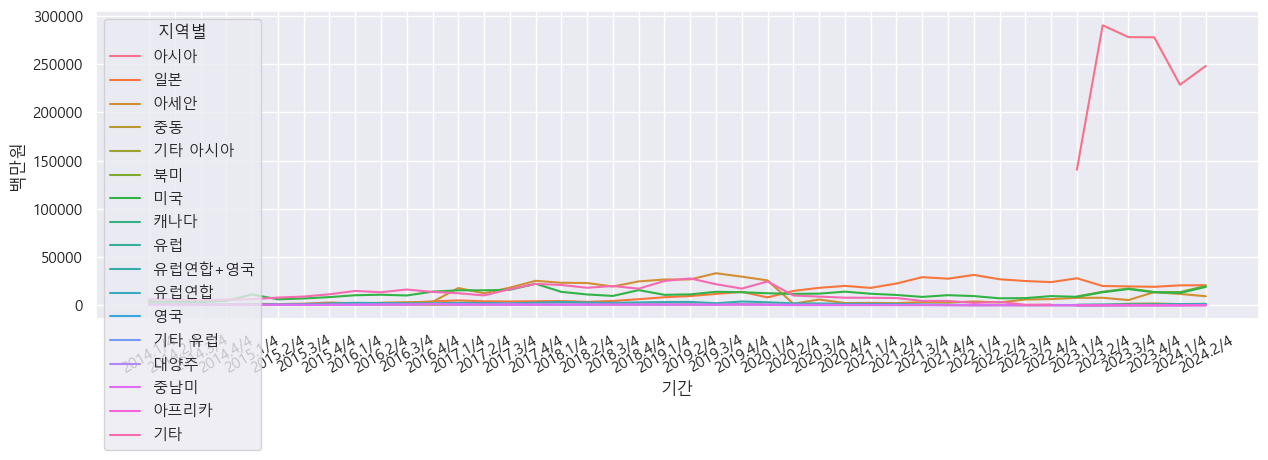

In [45]:
# 중국을 빼면 아시아가 가장 높음
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["지역별"] != "중국"], x="기간", y="백만원", hue="지역별")

<Axes: xlabel='기간', ylabel='백만원'>

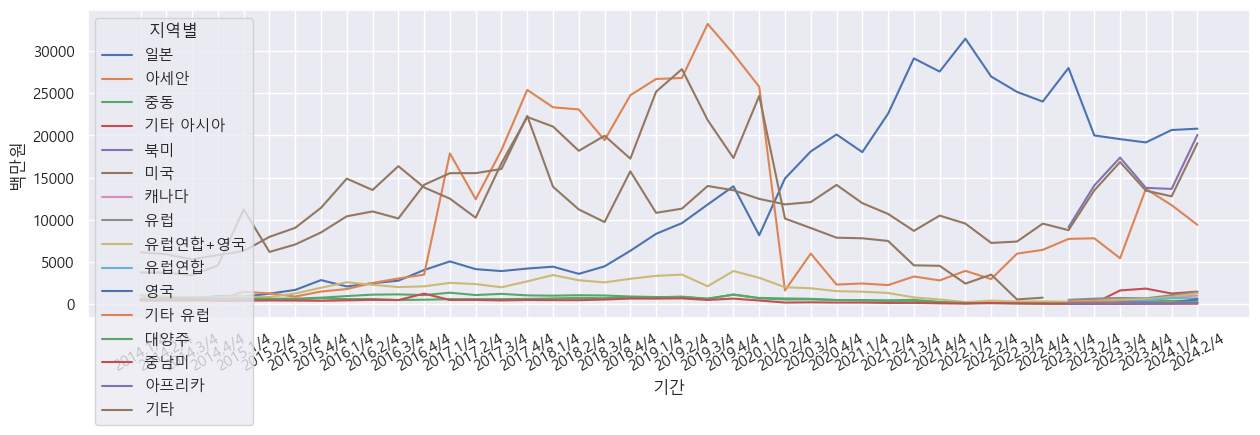

In [48]:
# 중국과 아시아를 빼면 일본이 최근 가장 높음
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[~df_cosmetic["지역별"].isin(["중국", "아시아"])], x="기간", y="백만원", hue="지역별", palette="deep")

<Axes: xlabel='기간', ylabel='백만원'>

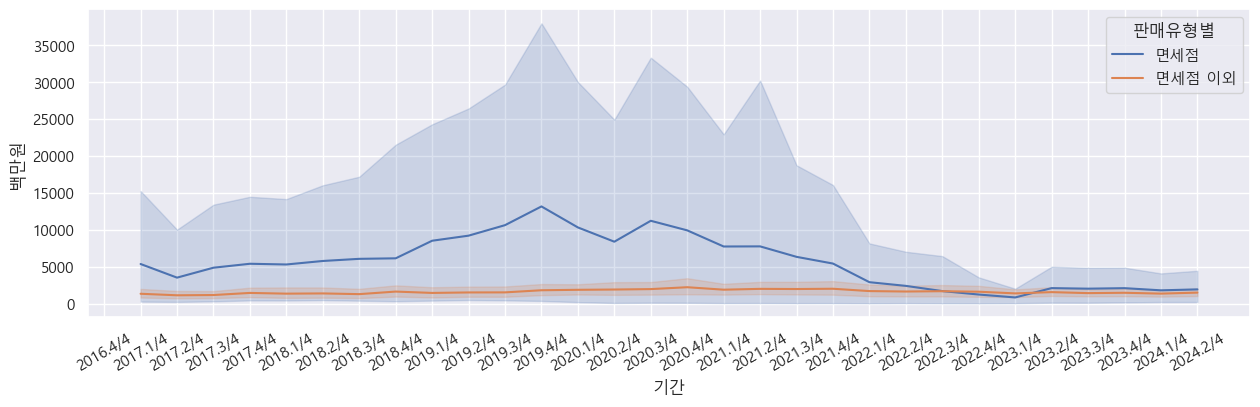

In [49]:
# "계" 데이터를 빼고 그래프를 그리니 온라인 면세점이 성장했다가 감소한 사실을 알 수 있음
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

C:\Users\josun\AppData\Local\Temp\ipykernel_5744\3704881244.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)


<Axes: xlabel='기간', ylabel='백만원'>

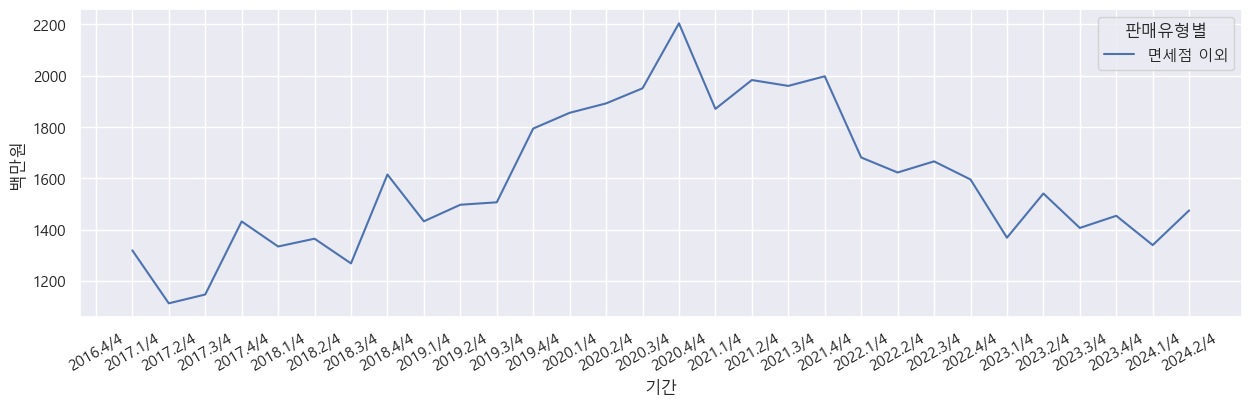

In [50]:
# 면세점 이외만 보면 마찬가지로 증가했다가 감소한 사실을 알 수 있음
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

# 5.7 - 패션 의류 온라인 해외 직접 판매액 시각화

### 핵심 키워드

- sns.lineplot()

- plt.figure(), plt.xticks()

## 의류 및 패션 관련 상품의 판매액 시각화

In [52]:
df_fashion = df[df["상품군별"] == "의류 및 패션 관련 상품"].copy()
df_fashion.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
2016,아시아,의류 및 패션 관련 상품,계,2014.1/4,NaN,2014,1
2017,아시아,의류 및 패션 관련 상품,면세점,2014.1/4,NaN,2014,1
2018,아시아,의류 및 패션 관련 상품,면세점 이외,2014.1/4,NaN,2014,1
2067,중국,의류 및 패션 관련 상품,계,2014.1/4,12206.0,2014,1
2068,중국,의류 및 패션 관련 상품,면세점,2014.1/4,NaN,2014,1


In [54]:
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
2016,아시아,의류 및 패션 관련 상품,계,2014.1/4,NaN,2014,1
2067,중국,의류 및 패션 관련 상품,계,2014.1/4,12206.0,2014,1
2118,일본,의류 및 패션 관련 상품,계,2014.1/4,13534.0,2014,1
2169,아세안,의류 및 패션 관련 상품,계,2014.1/4,3473.0,2014,1
2220,중동,의류 및 패션 관련 상품,계,2014.1/4,342.0,2014,1


<Axes: xlabel='기간', ylabel='백만원'>

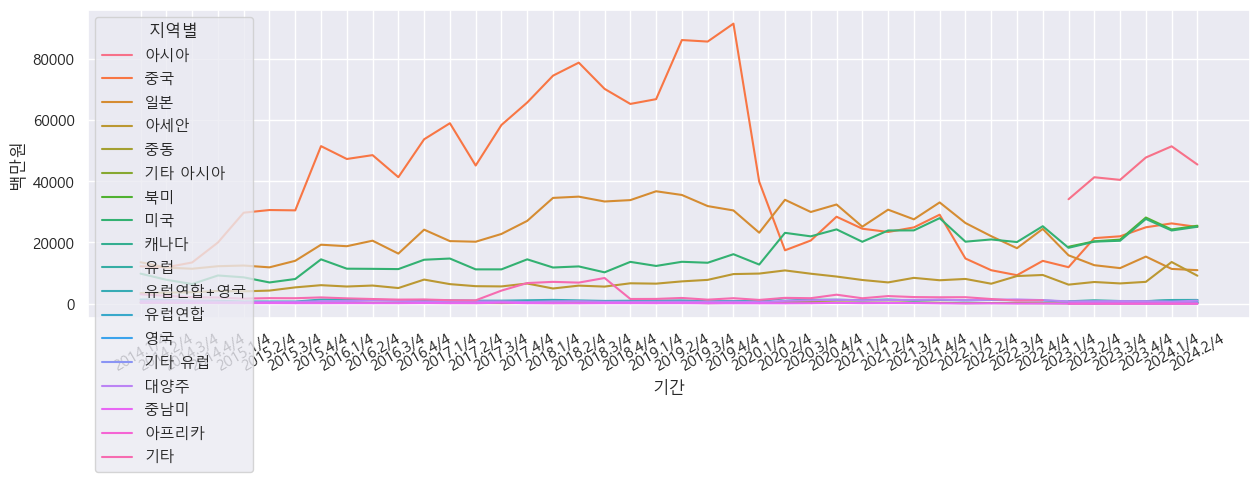

In [57]:
# 색깔이 헷갈려 아래 그래프와 함께 비교
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="지역별")

<Axes: xlabel='기간', ylabel='백만원'>

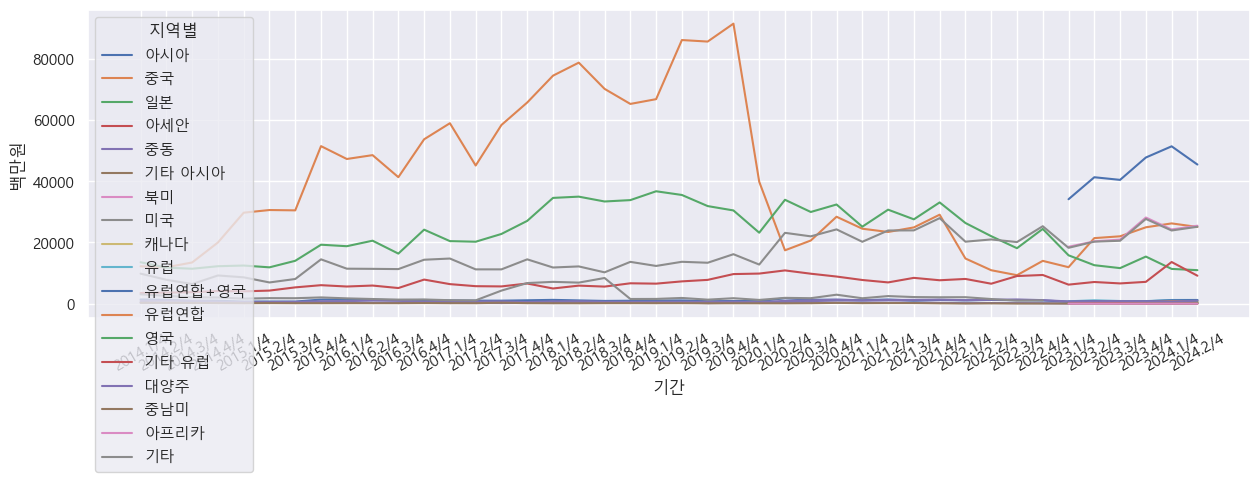

In [56]:
# 아시아, 중국, 미국 지역이 높음
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="지역별", palette="deep")

C:\Users\josun\AppData\Local\Temp\ipykernel_5744\1835984437.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)


<Axes: xlabel='기간', ylabel='백만원'>

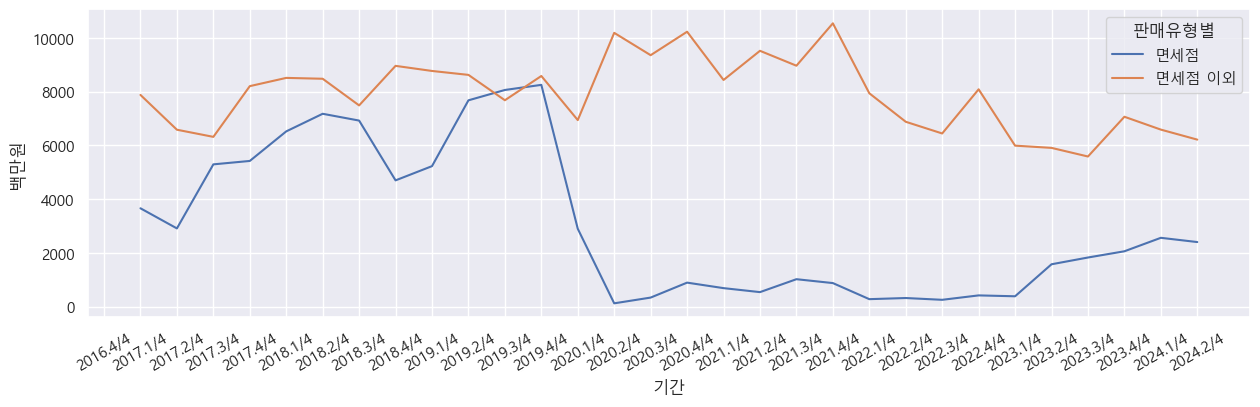

In [61]:
# 면세점에서 중간에 크게 감소한 것을 알 수 있음
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련 상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

# 5.8 - 데이터 pivot table로 집계하고 heatmap 으로 표현하기

### 핵심 키워드

- df.pivot_table()

- sns.heatmap()

## 데이터 집계하기

In [64]:
df_fashion.pivot_table(index="지역별", columns="연도", values="백만원")

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역별,,,,,,,,,,,
기타,2420.75,1812.00,1479.50,3298.00,5975.25,1618.75,1951.75,2116.00,1420.75,NaN,NaN
기타 아시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.00,202.0
기타 유럽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.25,61.5
대양주,848.00,587.25,850.25,679.00,681.25,622.25,937.25,1191.50,1224.00,781.25,804.0
미국,8305.75,9516.50,12112.75,12909.50,11968.75,13884.00,20551.75,24011.00,21673.50,21691.00,24525.5
북미,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22008.75,24856.5
아세안,3734.00,4909.75,6119.50,6074.25,5767.00,7811.75,9834.75,7686.00,8245.00,6756.25,11370.0
아시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40924.75,48458.0
아프리카,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,1.0


In [68]:
country = ["대양주", "미국", "아세안", "유럽연합+영국", "일본", "중국", "중남미", "중동"]

df_fashion.loc[df_fashion["지역별"].isin(country)].pivot_table(index="지역별", columns="연도", values="백만원")

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역별,,,,,,,,,,,
대양주,848.00,587.25,850.25,679.00,681.25,622.25,937.25,1191.50,1224.00,781.25,804.0
미국,8305.75,9516.50,12112.75,12909.50,11968.75,13884.00,20551.75,24011.00,21673.50,21691.00,24525.5
아세안,3734.00,4909.75,6119.50,6074.25,5767.00,7811.75,9834.75,7686.00,8245.00,6756.25,11370.0
유럽연합+영국,1121.25,843.50,1224.75,1022.75,1028.50,923.50,1282.00,1179.00,1110.50,731.00,1136.5
일본,12240.00,14398.50,19976.25,22632.75,34200.00,33659.25,29882.75,29135.75,22746.00,13844.00,11150.0
중국,14382.75,35584.75,47733.00,57082.50,72212.00,82566.75,26586.50,25483.00,12242.25,20076.75,25656.0
중남미,243.75,154.00,162.25,193.00,144.00,136.00,153.50,162.50,52.50,27.50,22.0
중동,293.00,254.50,242.00,202.00,219.75,237.75,444.00,345.75,167.25,79.75,80.0


In [70]:
df_fashion.pivot_table(index="지역별", columns="연도", values="백만원", aggfunc="sum")

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역별,,,,,,,,,,,
기타,9683.0,7248.0,5918.0,13192.0,23901.0,6475.0,7807.0,8464.0,5683.0,0.0,0.0
기타 아시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,672.0,404.0
기타 유럽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605.0,123.0
대양주,3392.0,2349.0,3401.0,2716.0,2725.0,2489.0,3749.0,4766.0,4896.0,3125.0,1608.0
미국,33223.0,38066.0,48451.0,51638.0,47875.0,55536.0,82207.0,96044.0,86694.0,86764.0,49051.0
북미,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88035.0,49713.0
아세안,14936.0,19639.0,24478.0,24297.0,23068.0,31247.0,39339.0,30744.0,32980.0,27025.0,22740.0
아시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163699.0,96916.0
아프리카,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0


In [71]:
df_fashion["판매유형별"].value_counts()

계    756
Name: 판매유형별, dtype: int64

In [72]:
result = df_fashion.pivot_table(index="지역별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역별,,,,,,,,,,,
기타,9683.0,7248.0,5918.0,13192.0,23901.0,6475.0,7807.0,8464.0,5683.0,0.0,0.0
기타 아시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,672.0,404.0
기타 유럽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605.0,123.0
대양주,3392.0,2349.0,3401.0,2716.0,2725.0,2489.0,3749.0,4766.0,4896.0,3125.0,1608.0
미국,33223.0,38066.0,48451.0,51638.0,47875.0,55536.0,82207.0,96044.0,86694.0,86764.0,49051.0
북미,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88035.0,49713.0
아세안,14936.0,19639.0,24478.0,24297.0,23068.0,31247.0,39339.0,30744.0,32980.0,27025.0,22740.0
아시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163699.0,96916.0
아프리카,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0


<Axes: xlabel='연도', ylabel='지역별'>

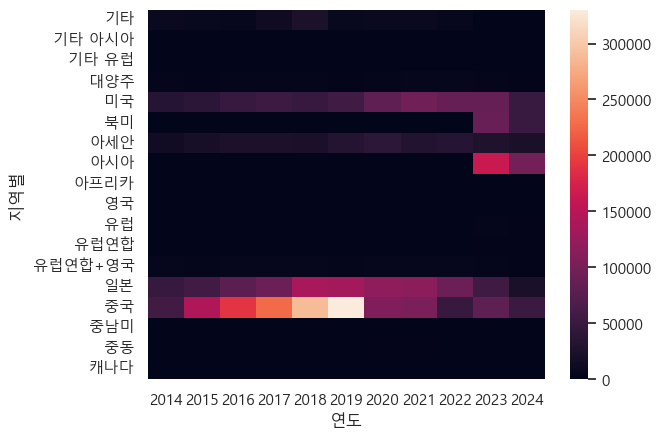

In [73]:
sns.heatmap(result)

<Axes: xlabel='연도', ylabel='지역별'>

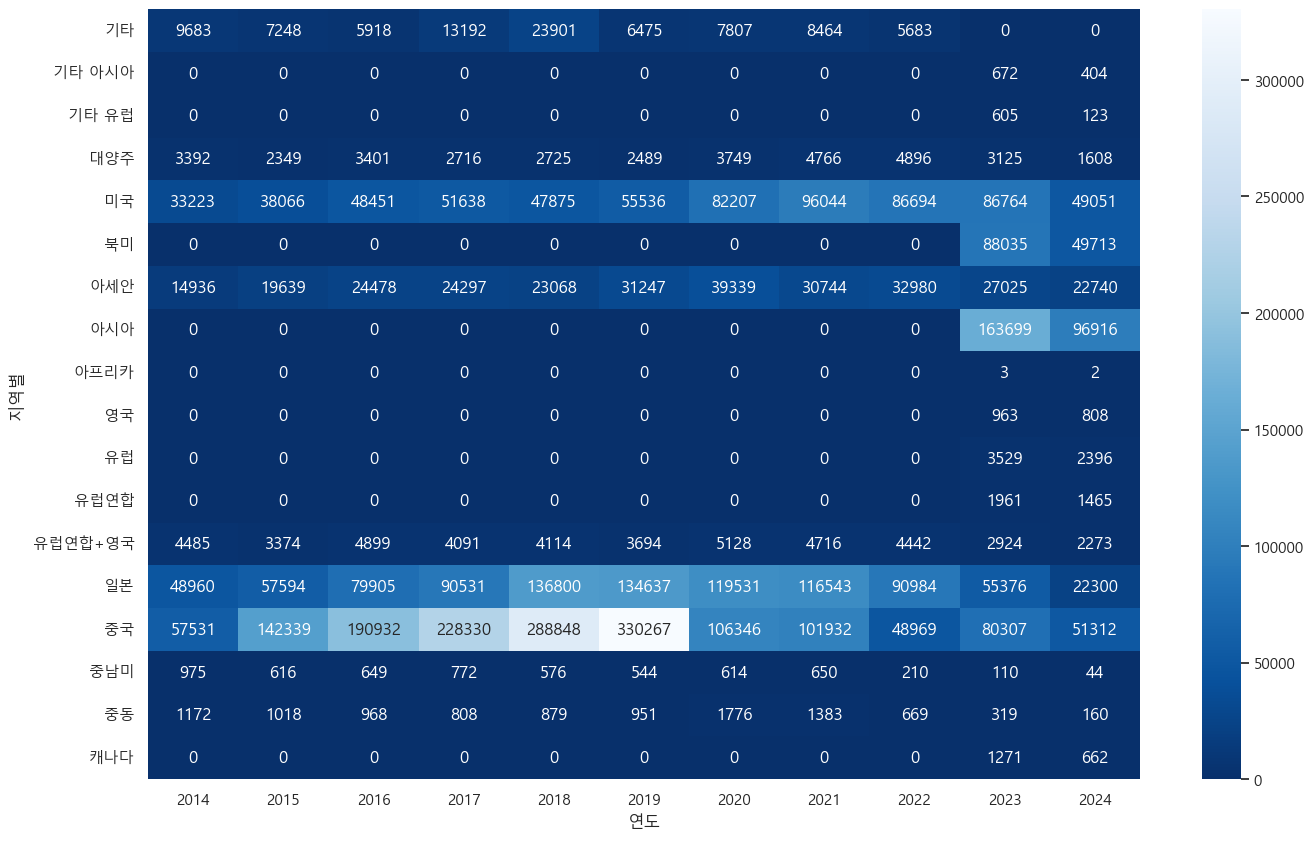

In [82]:
plt.figure(figsize=(16, 10))
sns.heatmap(result, cmap = "Blues_r", annot=True, fmt=".0f")

# 5.9 - 전체상품군별 시각화

### 핵심 키워드

- sns.barplot()

- sns.lineplot()

- plt.legend()

In [83]:
df_total

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
1992,아시아,컴퓨터 및 주변기기,계,2014.1/4,NaN,2014,1
1995,아시아,가전·전자·통신기기,계,2014.1/4,NaN,2014,1
1998,아시아,가전·전자,계,2014.1/4,NaN,2014,1
2001,아시아,통신기기,계,2014.1/4,NaN,2014,1
2004,아시아,소프트웨어,계,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
42621,기타,아동·유아용품,계,2024.2/4,NaN,2024,2
42624,기타,음·식료품,계,2024.2/4,NaN,2024,2
42627,기타,농축수산물,계,2024.2/4,NaN,2024,2
42630,기타,생활·자동차용품,계,2024.2/4,NaN,2024,2


<Axes: xlabel='연도', ylabel='백만원'>

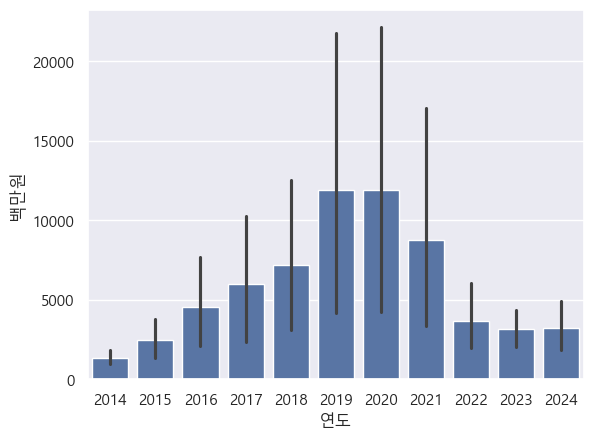

In [84]:
# 판매액이 증가했다가 2020년 때 유지하더니 2021년부터 감소하기 시작
sns.barplot(data=df_total, x="연도", y="백만원")

## lineplot 그리기

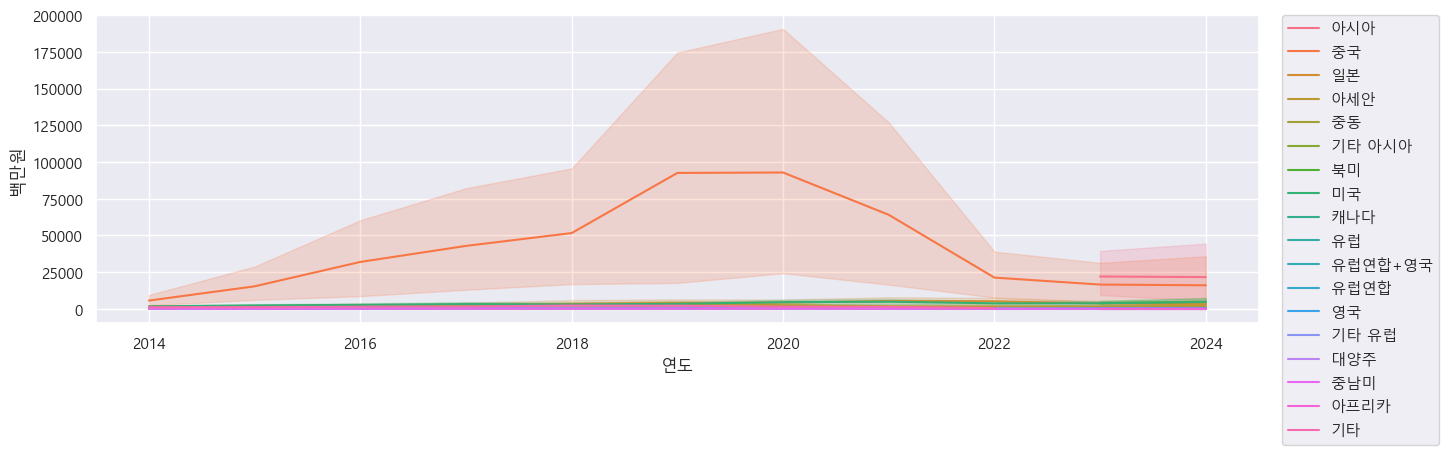

In [87]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="지역별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)    # bbox_to_anchor를 변경하면 그래프와 범례 사이의 간격을 조절

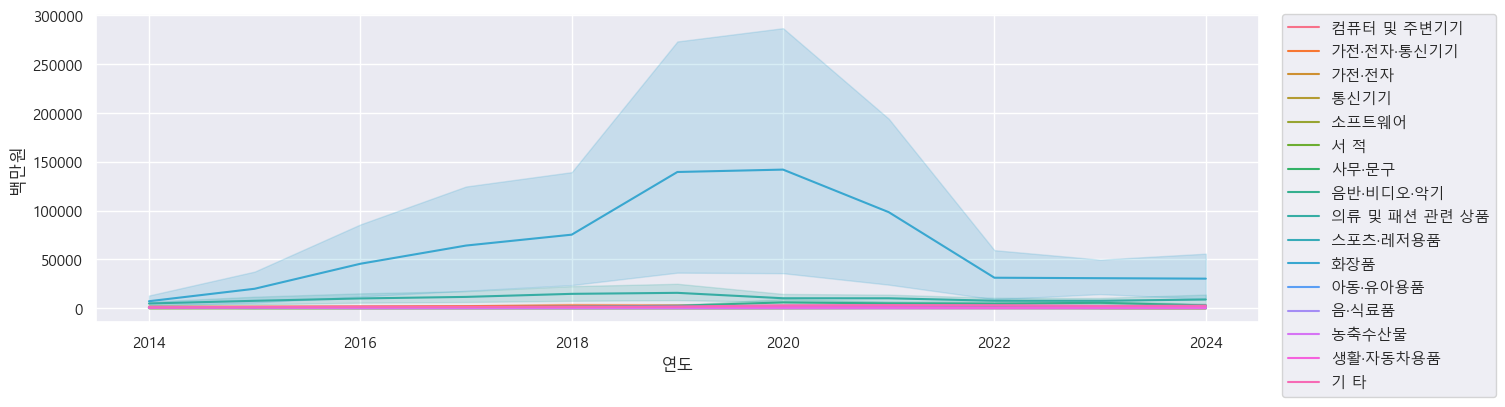

In [89]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)